<a href="https://colab.research.google.com/github/harishdiction/stock-market/blob/main/stock_market_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Stock Market Forecasting

In [ ]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [3]:
# Save data to CSV file
data= pd.read_csv('sap_stock.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


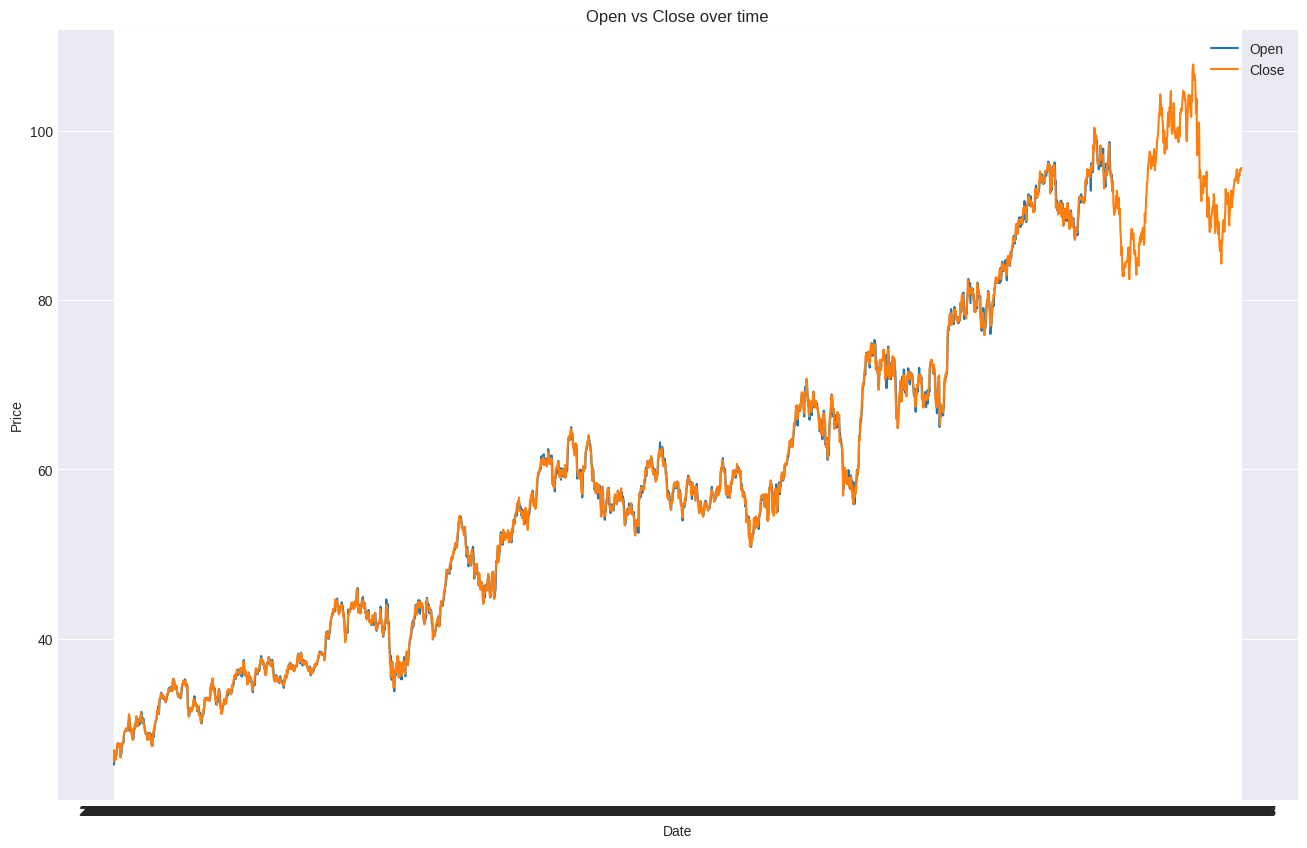

In [53]:
# @title Open vs Close over time

import matplotlib.pyplot as plt
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open vs Close over time')
_ = plt.legend()

In [5]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [6]:
# Get descriptive statistics summary of data set
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [7]:
# Display features in data set
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [8]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Date','Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [34]:
df.head()

,index,Date,Close
0,0,2009-03-09,25.59
1,1,2009-03-10,26.87
2,2,2009-03-11,26.64
3,3,2009-03-12,26.18
4,4,2009-03-13,25.73


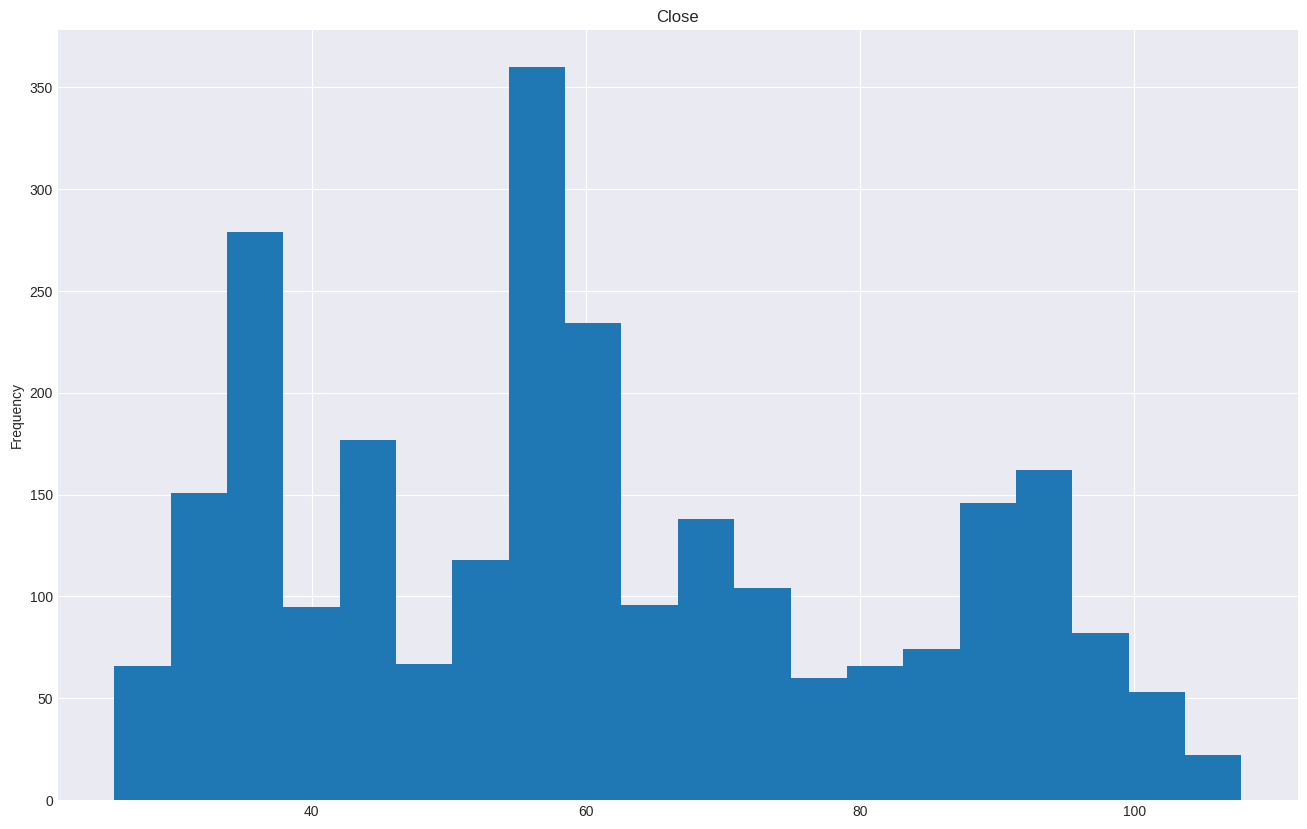

In [51]:
# @title Close

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

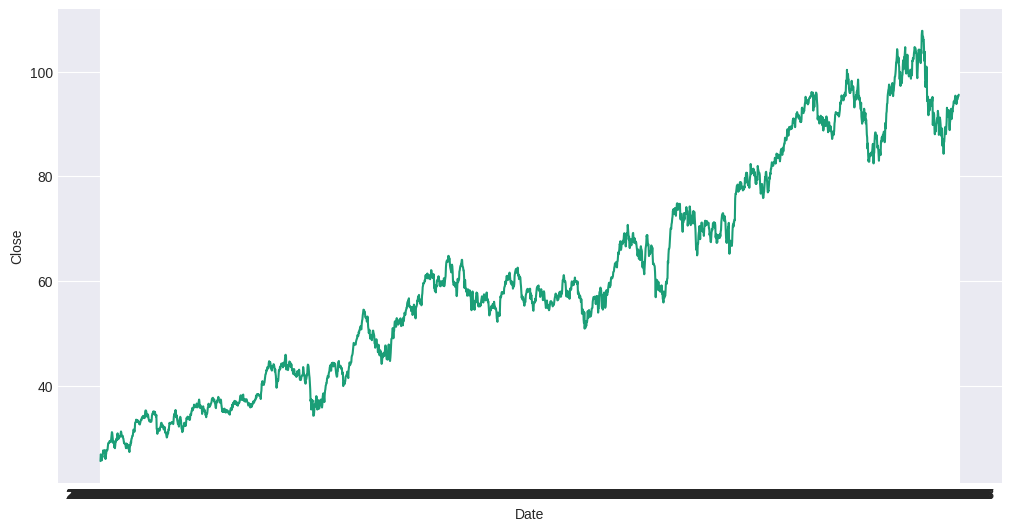

In [52]:
# @title Date vs Close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

In [10]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2550 non-null   int64  
 1   Date    2550 non-null   object 
 2   Close   2550 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.9+ KB


In [11]:
# Check for missing values in the columns
df.isna().values.any()

False

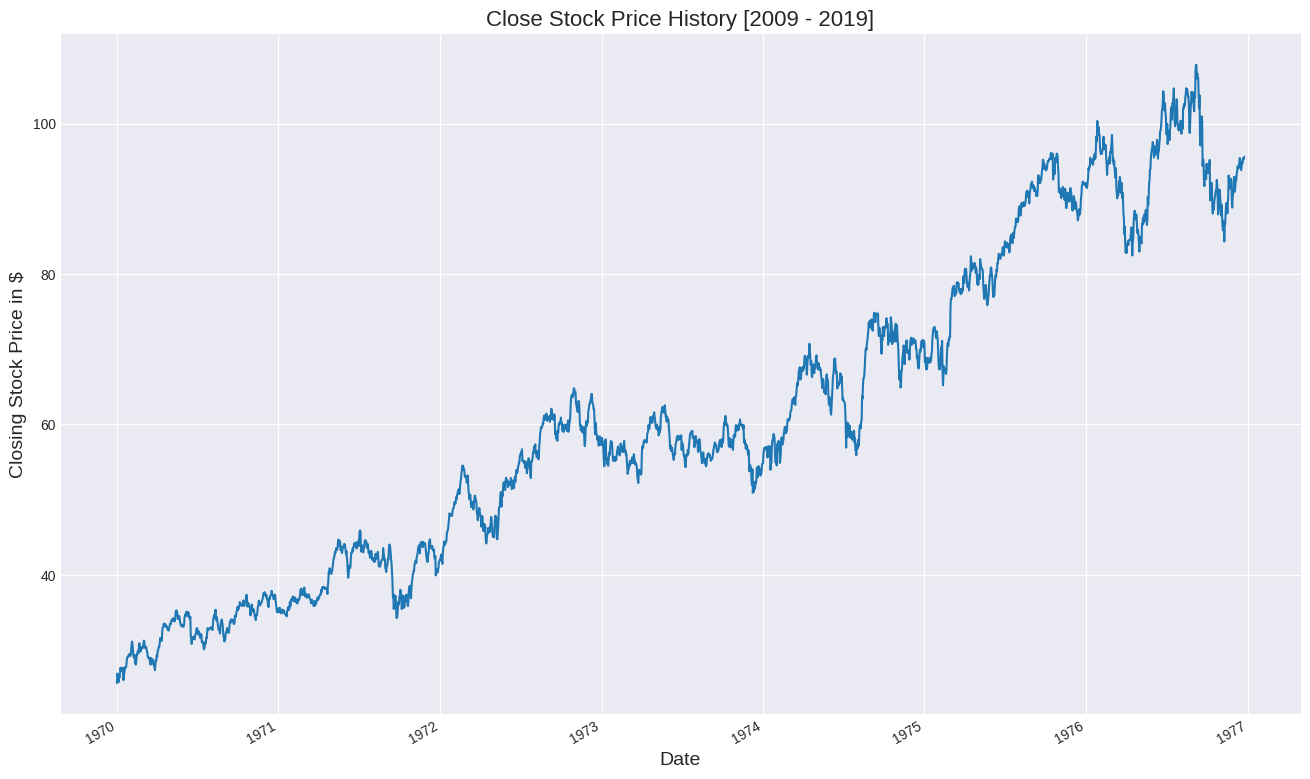

In [12]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [13]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [14]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [15]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [16]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

### Model Evaluation

In [ ]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.02762424028961455
Intercept:  25.723432313963862


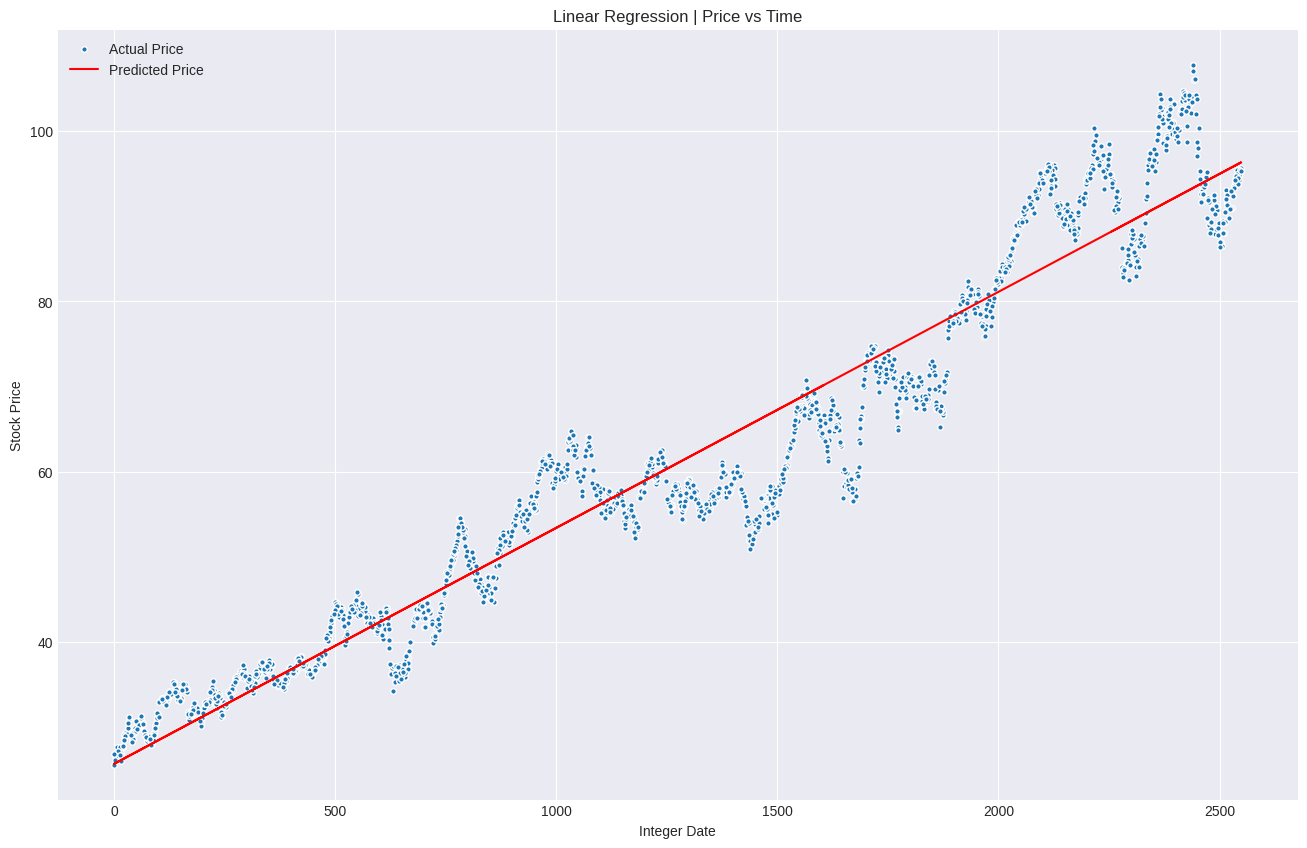

In [18]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model

In [19]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [20]:
# Generate array with predicted values
y_pred = model.predict(X_test)

## Regression Evaluation

In [21]:
# Get number of rows in data set for random sample
df.shape

(2550, 3)

In [22]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [24]:
df_sample.head()

,index,Date,Close
240,240,2010-02-08,32.56
243,243,2010-02-11,31.12
300,300,2010-05-05,35.68
412,412,2010-10-08,36.73
665,665,2011-10-04,36.87


In [ ]:
sample_pred = model.predict(np.array(df_sample.index).reshape(-1,1))
df_sample['prediction'] = sample_pred

In [45]:
df_sample.head()

,index,Date,Close,prediction
240,240,2010-02-08,32.56,32.319107
243,243,2010-02-11,31.12,32.402264
300,300,2010-05-05,35.68,33.982241
412,412,2010-10-08,36.73,37.086756
665,665,2011-10-04,36.87,44.099636


In [30]:
# display features in data set
df_sample.columns

Index(['index', 'Date', 'Close', 'prediction'], dtype='object')

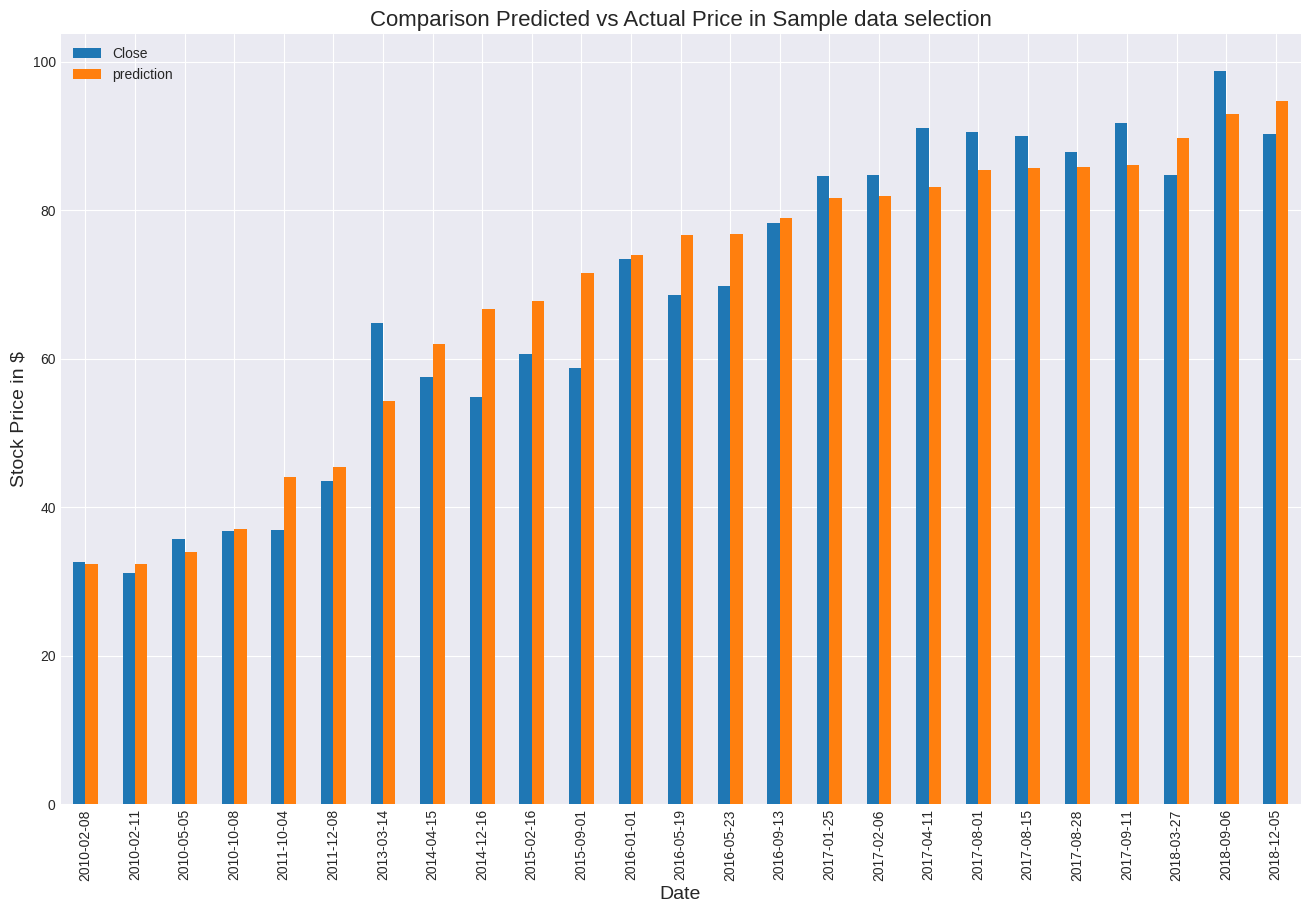

In [32]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

#

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

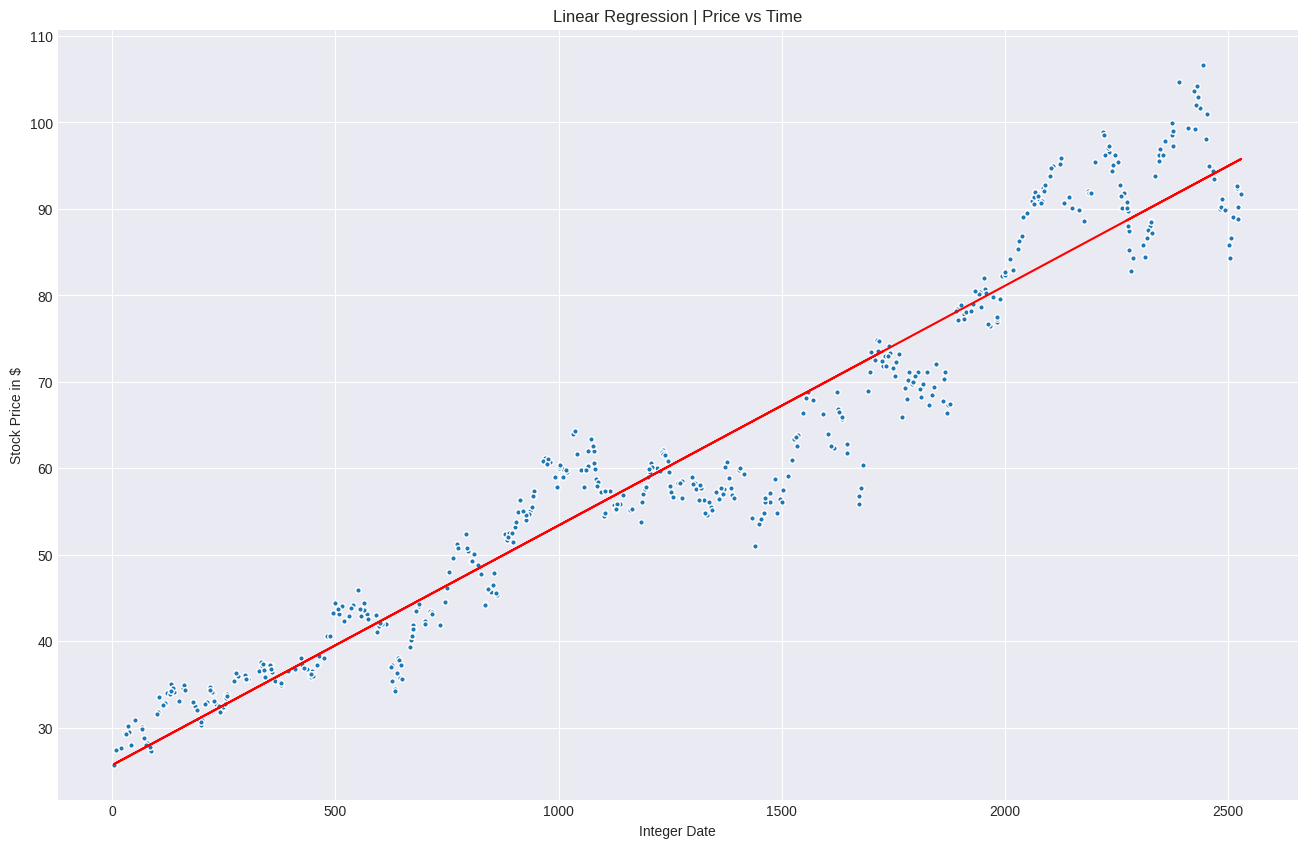

In [33]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

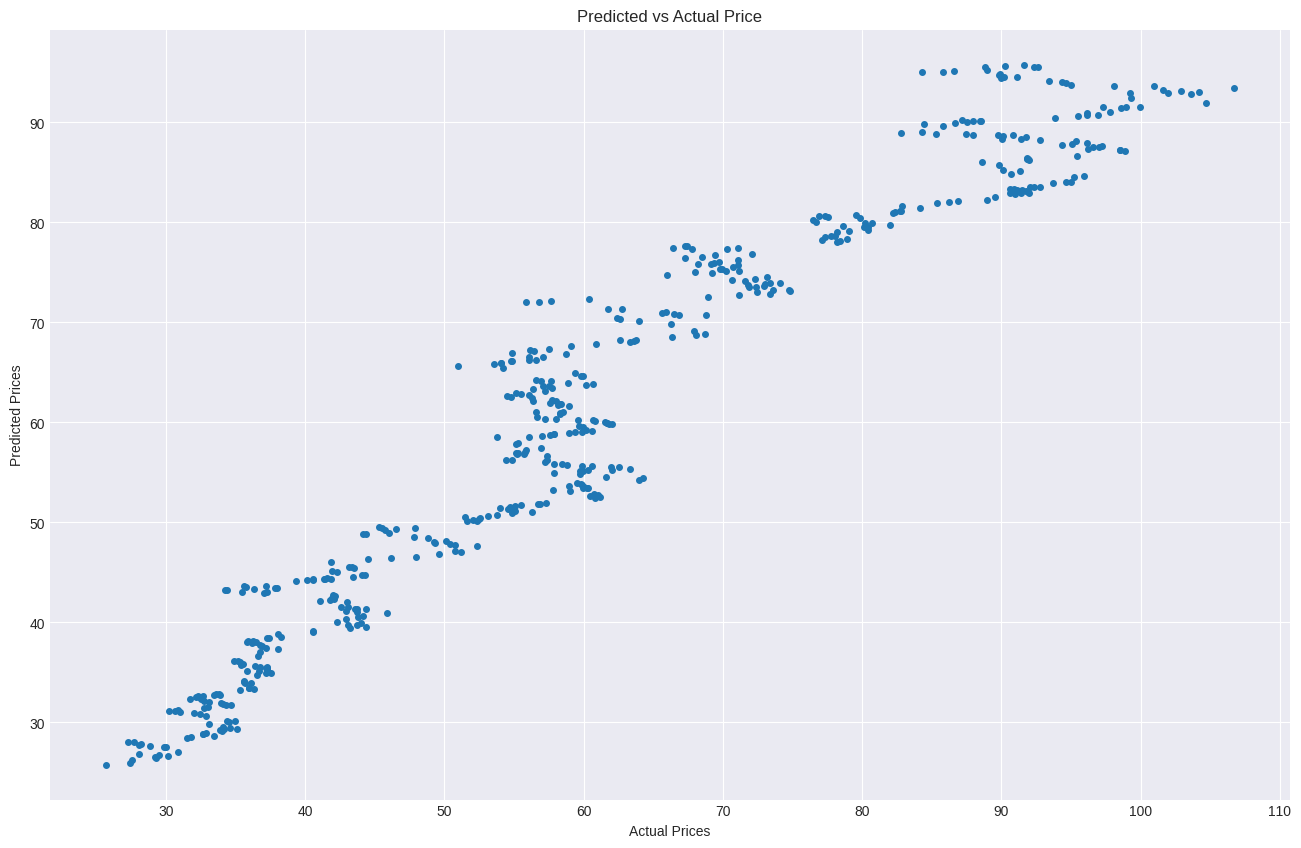

In [35]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

In [36]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [46]:
df.head()

,index,Date,Close,Prediction
0,0,2009-03-09,25.59,25.666573
1,1,2009-03-10,26.87,25.694292
2,2,2009-03-11,26.64,25.722011
3,3,2009-03-12,26.18,25.749730
4,4,2009-03-13,25.73,25.777449


<Axes: xlabel='Date'>

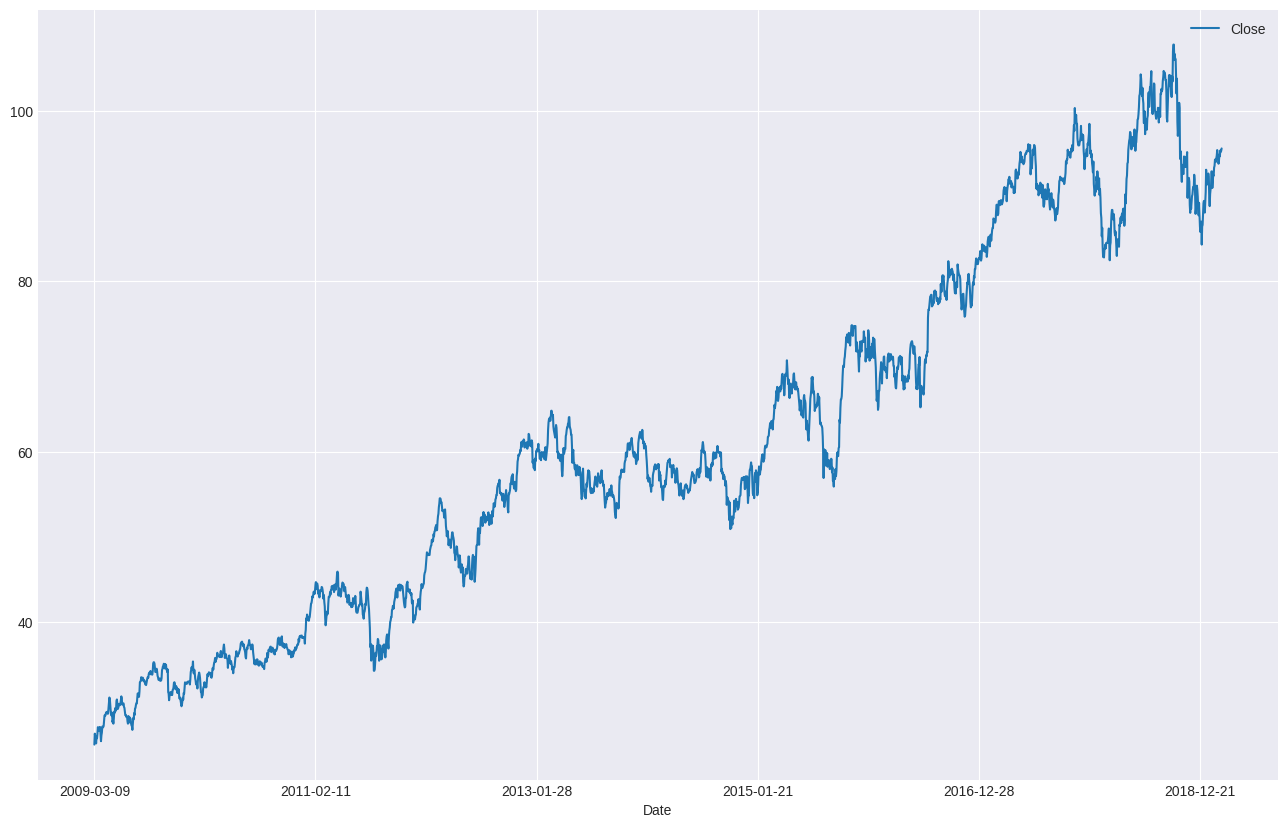

In [49]:
# @title Closing Price over Time

df.plot(x='Date', y='Close', kind='line')

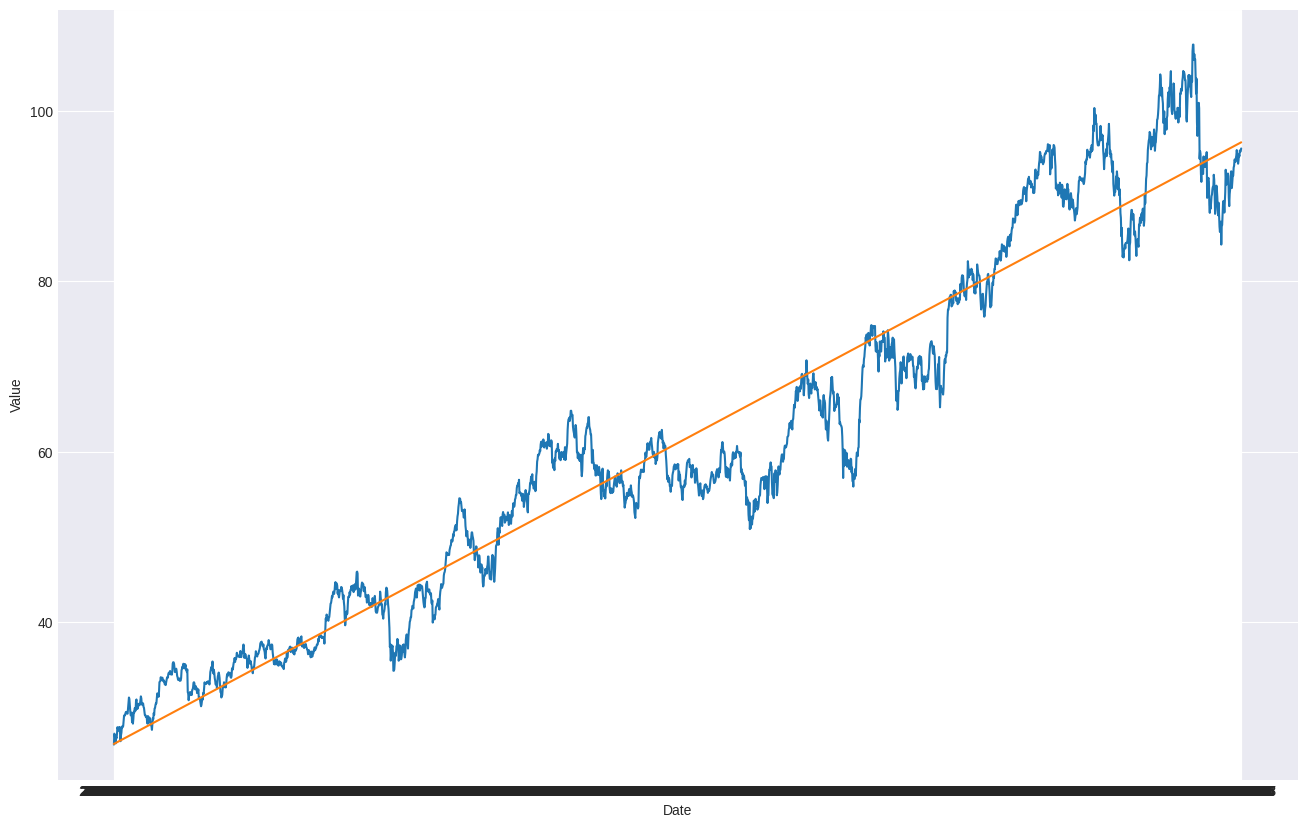

In [48]:
# @title Actual vs Predicted Stock Value over Time

import matplotlib.pyplot as plt
sns.lineplot(data=df, x="Date", y="Close")
sns.lineplot(data=df, x="Date", y="Prediction")
plt.xlabel("Date")
_ = plt.ylabel("Value")

In [38]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [39]:
# Statistical summary of test data
df['Close'].describe()

count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

# ERROR ANALYZE

In [40]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.1554022521995515
Mean Squared Error: 27.706204725601193
Root Mean Squared Error: 5.26366837154481


# ACCURACY ACTUAL AND PREDICATION




---



In [41]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9366537136039534


In [42]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9366538702749849